# **Ultimate Data Science Challenge**

# Part 1

In [1]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta

In [2]:
index = pd.read_json(r"C:\Users\ryanp\Desktop\Springboard\Springboard\ultimate_challenge\logins.json")
index.to_csv(r"C:\Users\ryanp\Desktop\Springboard\Springboard\ultimate_challenge\logins.csv", index=False)

In [3]:
index.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
index.shape

(93142, 1)

In [5]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


There are no missing data. 

In [6]:
index.describe()

C:\Users\ryanp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [7]:
index['Count'] = index.count()
index = index.resample('15min', on='login_time').agg({'Count':'size'})
index.head()

,Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
index.shape

(9788, 1)

In [9]:
index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [10]:
index.describe(datetime_is_numeric=True)

,Count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


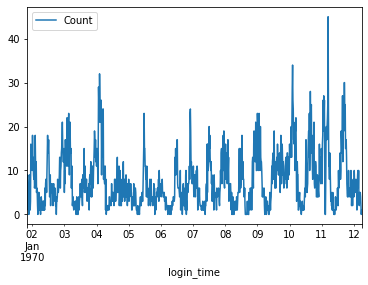

In [11]:
index.iloc[0:1000].plot(y='Count')
plt.show()

#### This graph shows the first 11 days and shows that there is daily cycle of logins. Login peaks are during the evening times and decrease throughout the day. There are some days the login peaks are higher, which can be investigated with any possible marketing strategies or events released at that time. Although this graph shows a daily cycle, the data can be further analyzed. 

In [12]:
index['date'] = pd.to_datetime(index.index)

In [13]:
index['month'], index['week'], index['weekday'], index['hour'] = index['date'].dt.month, index['date'].dt.week, index['date'].dt.weekday, index['date'].dt.hour

C:\Users\ryanp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [14]:
index.head()

,Count,date,month,week,weekday,hour
login_time,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,1,1,3,20
1970-01-01 20:15:00,6,1970-01-01 20:15:00,1,1,3,20
1970-01-01 20:30:00,9,1970-01-01 20:30:00,1,1,3,20
1970-01-01 20:45:00,7,1970-01-01 20:45:00,1,1,3,20
1970-01-01 21:00:00,1,1970-01-01 21:00:00,1,1,3,21


In [15]:
index.describe()

,Count,month,week,weekday,hour
count,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000
mean,9.515938,2.259093,8.325296,3.035554,11.496935
std,8.328818,1.017219,4.215948,2.012722,6.922294
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,1.000000,5.000000,1.000000,5.000000
50%,7.000000,2.000000,8.000000,3.000000,11.000000
75%,13.000000,3.000000,12.000000,5.000000,17.000000
max,73.000000,4.000000,16.000000,6.000000,23.000000


Text(0.5, 0, 'Month')

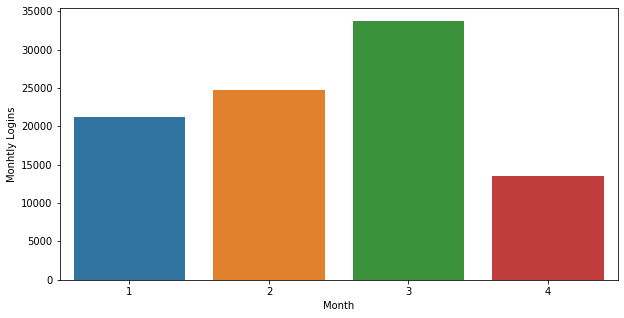

In [16]:
monthly_logins = index.groupby('month')['Count'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(monthly_logins.index, monthly_logins.values)
plt.ylabel('Monhtly Logins')
plt.xlabel('Month')

#### March had the highest amount of logins and April had the lowest amount of logins. 

Text(0.5, 0, 'Week')

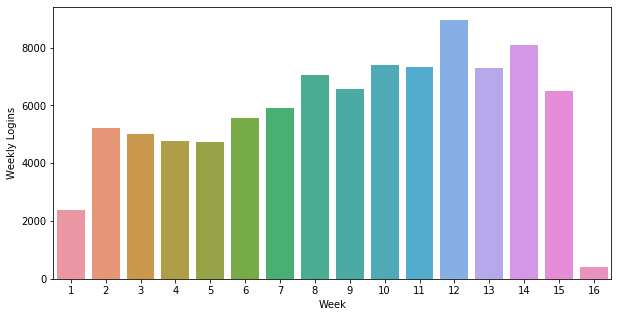

In [17]:
weekly_logins = index.groupby('week')['Count'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(weekly_logins.index, weekly_logins.values)
plt.ylabel('Weekly Logins')
plt.xlabel('Week')

#### Week 12 had the highest amount of logins and week 16 had the lowest amount of logins. 

([<matplotlib.axis.XTick at 0x244d61a3c48>,
 <a list of 7 Text xticklabel objects>)

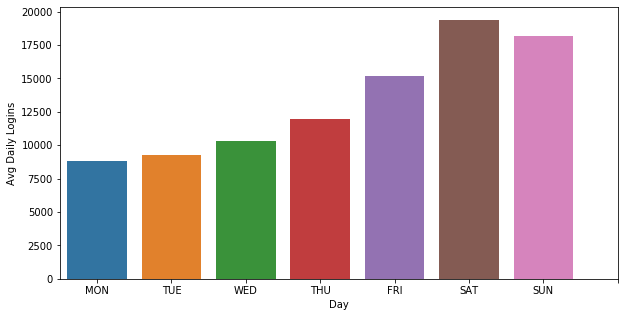

In [18]:
daily_logins = index.groupby('weekday')['Count'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(daily_logins.index, daily_logins.values)
plt.ylabel('Avg Daily Logins')
plt.xlabel('Day')

positions = (0, 1, 2, 3, 4, 5, 6, 7)
labels = ("MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN")

plt.xticks(positions, labels)

#### Saturday has the highest average logins and Monday has the lowest average logins. 

Text(0.5, 0, 'Hour')

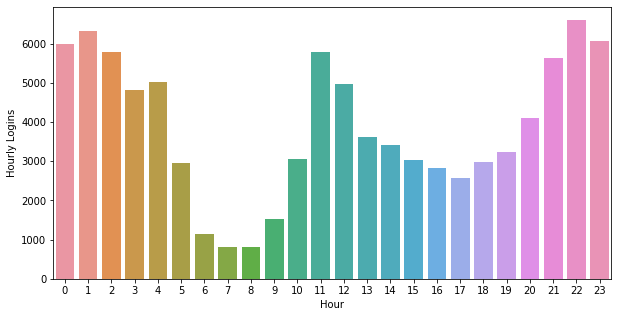

In [19]:
hourly_logins = index.groupby('hour')['Count'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(hourly_logins.index, hourly_logins.values)
plt.ylabel('Hourly Logins')
plt.xlabel('Hour')

#### Within the 4 months included in the data, this hourly chart confirms with the inital 15 min interval chart, that the most of the logins occur during the night. The peak logins occur at hour 22 or 10pm and is relatively consistent up to hour 4 or 4am until there is a significant decrease. 

# Part 2

#### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The key metric would be the total reimbursement of the toll cost. The cost can identify if the drivers are actually using the toll bridge to drive across the city. If there is an increase in the reimbursement total, then it shows that drivers are indeed using the toll to go across the 2 cities. If the total is decrease, then the drivers are not using the toll bridge. 

#### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
   - A: how you will implement the experiment
   - B: what statistical test(s) you will conduct to verify the significance of the observation
   - C: how you would interpret the results and provide recommendations to the city operations team along with any caveats.

A: Once the total reimbursment of all toll costs data are obtained. Customers can be identified using customer segmentation to find behavioral patterns of those that are more willing to take trips across the 2 cities. The data with other features such as date, time, trip distance, total trip cost, driver rating, rating of trip, and the other features to identify if there are any correlations or patterns with the trips that are taken between the 2 cities.   

 B: Test of Significance will be used to verify the significance of the observation. The test of significance will test the null hypothesis to either reject or not reject by using the p-value. 

C: I will use pairplots and distribution graphs to identify any correlations and patterns among the data. Furthermore, the data can be further analysed based on each feature to determine feature importance. 

# Part 3

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
import sklearn.cluster
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Data Wrangling

In [21]:
df = pd.read_json(r"C:\Users\ryanp\Desktop\Springboard\Springboard\ultimate_challenge\ultimate_data_challenge.json")
df.to_csv(r"C:\Users\ryanp\Desktop\Springboard\Springboard\ultimate_challenge\ultimate_data_challenge.csv", index=False)

- **city**: city this user signed up in
- **phone**: primary device for this user
- **signup_date**: date of account registration; in the form ‘YYYY MM DD’
- **last_trip_date**: the last time this user completed a trip; in the form ‘YYYY MM DD’
- **avg_dist**: the average distance in miles per trip taken in the first 30 days after signup
- **avg_rating_by_driver**: the rider’s average rating over all of their trips
- **avg_rating_of_driver**: the rider’s average rating of their drivers over all of their trips
- **surge_pct**: the percent of trips taken with surge multiplier > 1
- **avg_surge**: The average surge multiplier over all of this user’s trips
- **trips_in_first_30_days**: the number of trips this user took in the first 30 days after signing up
- **ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- **weekday_pct**: the percent of the user’s trips occurring during a weekday

In [22]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [23]:
df.shape

(50000, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [25]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by='count')

,count,%
city,0,0.000
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_surge,0,0.000
last_trip_date,0,0.000
surge_pct,0,0.000
ultimate_black_user,0,0.000
weekday_pct,0,0.000
avg_dist,0,0.000
avg_rating_by_driver,201,0.402


In [26]:
df = df.dropna()
df.shape

(41445, 12)

In [27]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,2.609675,4.601720,1.073822,8.898709,61.254897,5.460046,4.776446
std,4.059336,0.616104,0.198747,18.322061,34.813848,5.145174,0.404606
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.780000,5.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000


### City

Text(0.5, 0, 'City')

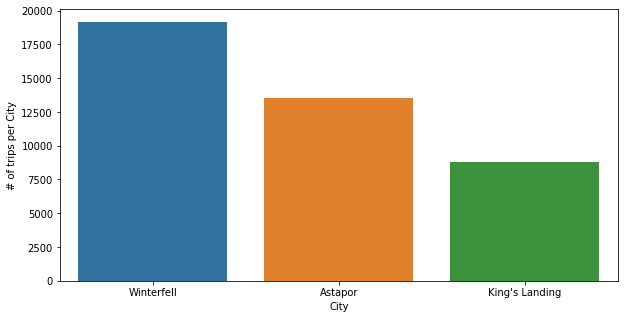

In [28]:
city_count = df.city.value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(city_count.index, city_count.values)
plt.ylabel('# of trips per City')
plt.xlabel('City')

### Drivers and Trip

Text(0.5, 0, 'city')

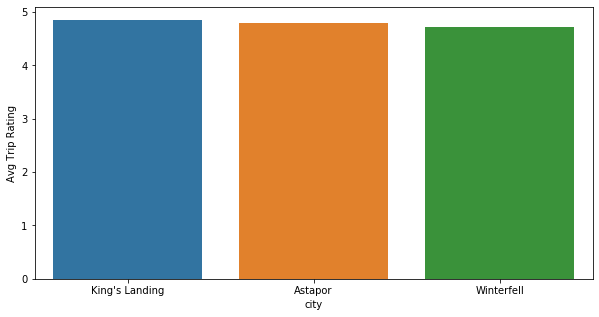

In [29]:
avg_trip_rating_per_city = df.groupby('city')['avg_rating_by_driver'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(avg_trip_rating_per_city.index, avg_trip_rating_per_city.values)
plt.ylabel('Avg Trip Rating')
plt.xlabel('city')

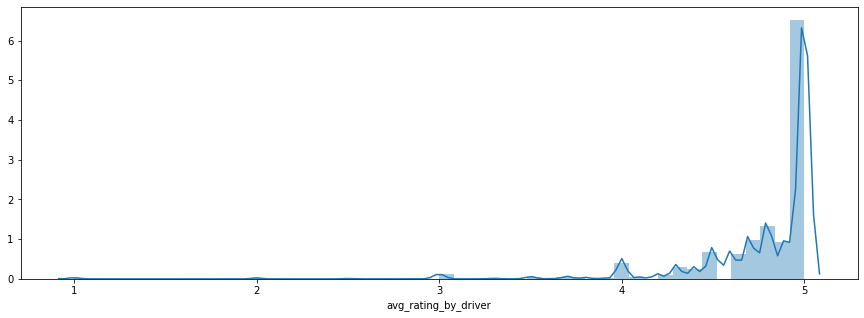

In [30]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df['avg_rating_by_driver'], ax=ax)
plt.show()

Text(0.5, 0, 'city')

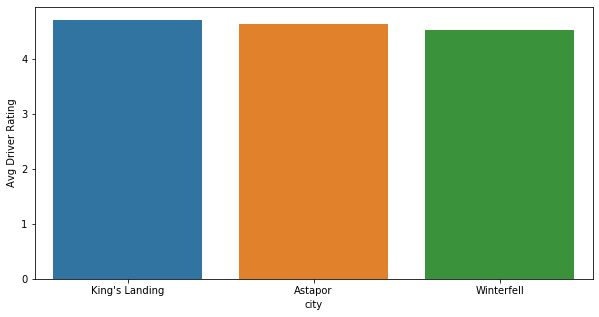

In [31]:
avg_driver_rating_per_city = df.groupby('city')['avg_rating_of_driver'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(avg_driver_rating_per_city.index, avg_driver_rating_per_city.values)
plt.ylabel('Avg Driver Rating')
plt.xlabel('city')

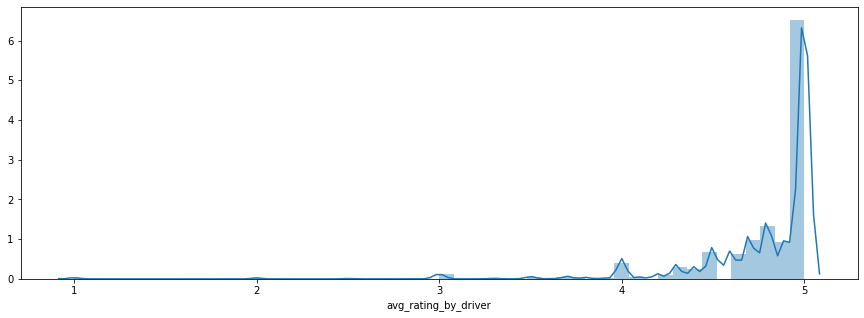

In [32]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df['avg_rating_by_driver'], ax=ax)
plt.show()

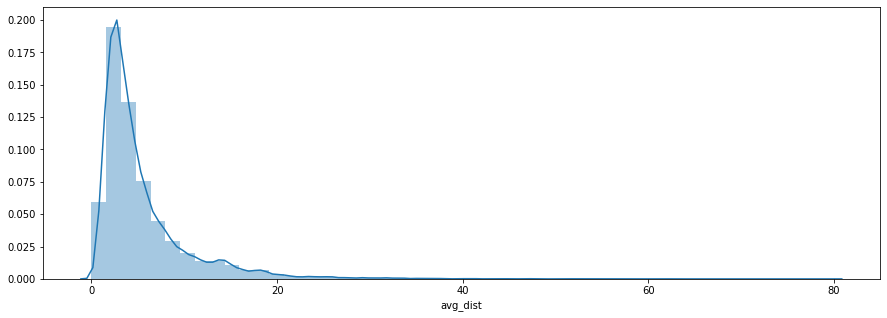

In [33]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df['avg_dist'], ax=ax)
plt.show()

### Customers

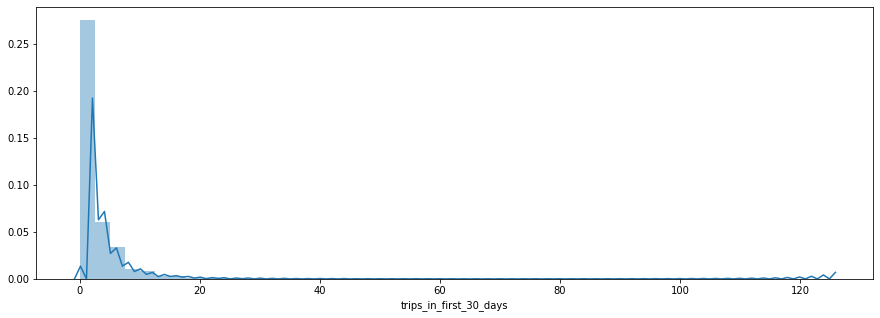

In [34]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df['trips_in_first_30_days'], ax=ax)
plt.show()

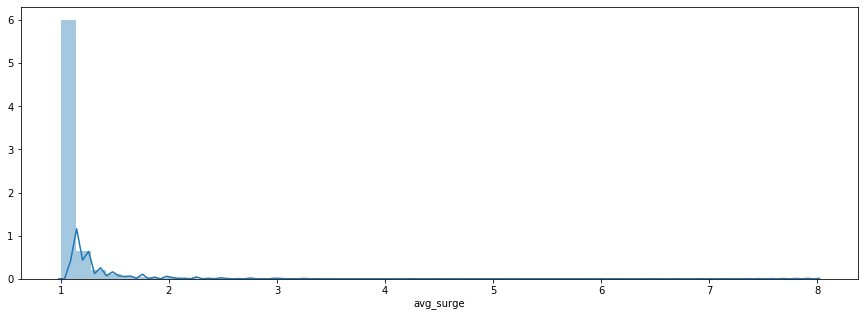

In [35]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df['avg_surge'], ax=ax)
plt.show()

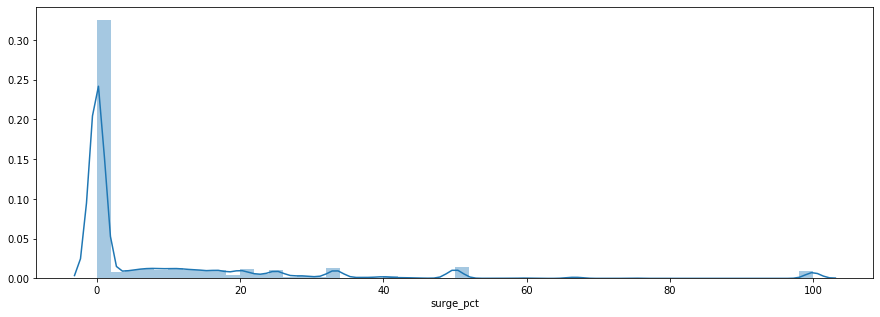

In [36]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df['surge_pct'], ax=ax)
plt.show()

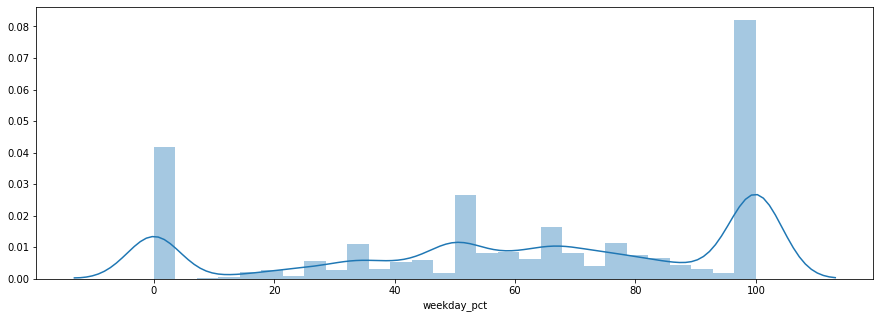

In [37]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df['weekday_pct'], ax=ax)
plt.show()

Text(0.5, 0, 'Type of Phone')

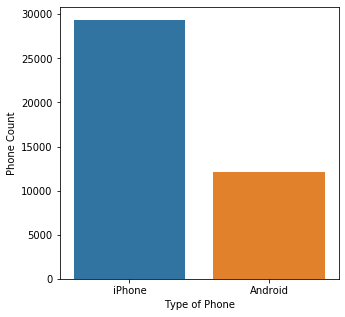

In [38]:
phone_count = df.phone.value_counts().sort_values(ascending=False)
plt.figure(figsize=(5, 5))
sns.barplot(phone_count.index, phone_count.values)
plt.ylabel('Phone Count')
plt.xlabel('Type of Phone')

Text(0.5, 0, 'Ultimate Black User')

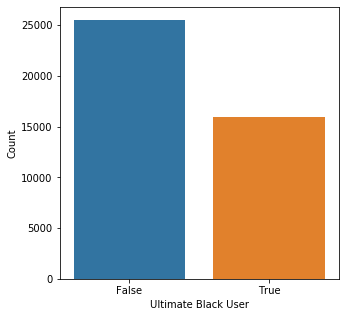

In [39]:
ultimate_black_user_count = df.ultimate_black_user.value_counts().sort_values(ascending=False)
plt.figure(figsize=(5, 5))
sns.barplot(ultimate_black_user_count.index, ultimate_black_user_count.values)
plt.ylabel('Count')
plt.xlabel('Ultimate Black User')

In [40]:
pairplot_data = df.drop(columns=['ultimate_black_user'])
pairplot_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,82.4,3.13,4.9


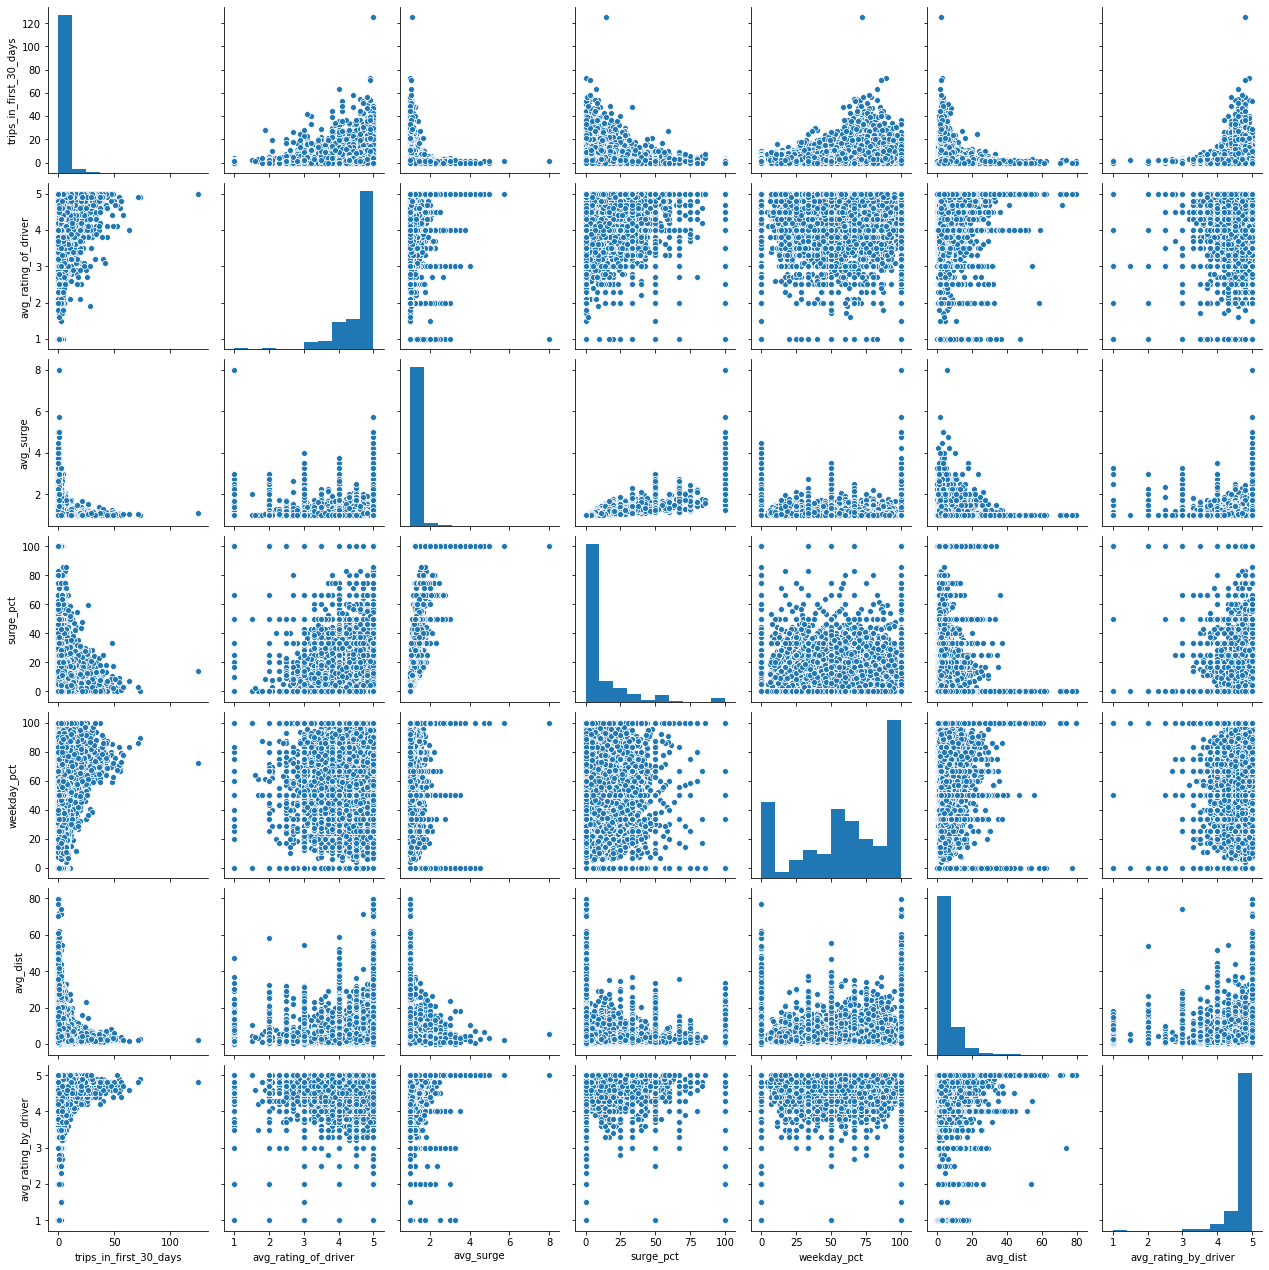

In [41]:
sns.pairplot(pairplot_data)

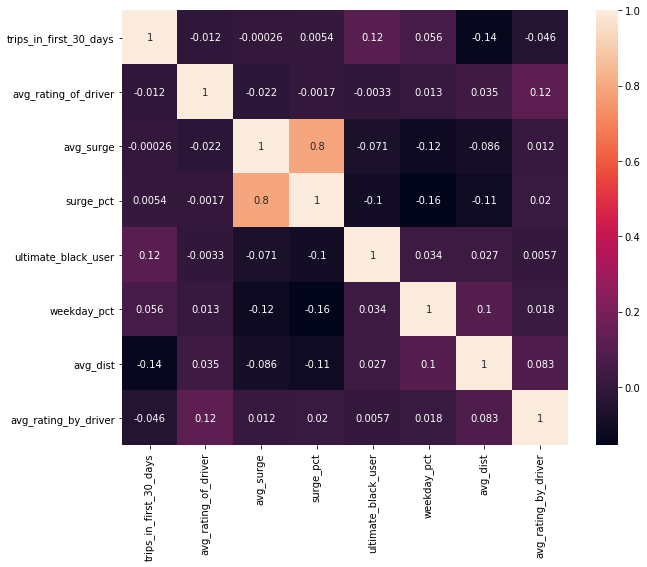

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

## Pre-Processing

#### Identifying users with 6 month retentions. 

In [43]:
from datetime import timedelta
from datetime import datetime, date
from dateutil.relativedelta import *
from sklearn.preprocessing import StandardScaler

In [44]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 5.1+ MB


In [46]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

max_date = datetime.date(data['signup_date'].max())

In [47]:
df['retention_date'] = df['signup_date'].apply(lambda x:x + relativedelta(months=+5)) 

In [48]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention_date
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-06-25
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-06-29
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-06-06
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-06-10
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-06-27


In [49]:
def retention_check(df):
    if df['last_trip_date'] > df['retention_date']: 
        return 1
    else:
        return 0

In [50]:
df['retention_check'] = df.apply(retention_check, axis=1)

In [51]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention_date,retention_check
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-06-25,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-06-29,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-06-06,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-06-10,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-06-27,0


Text(0.5, 0, 'Retention Users')

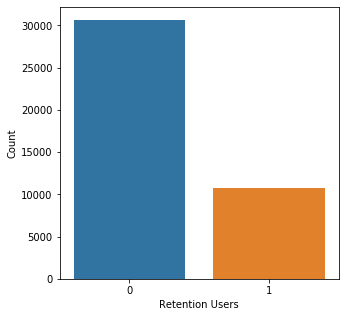

In [52]:
retention_count = df.retention_check.value_counts().sort_values(ascending=False)
plt.figure(figsize=(5, 5))
sns.barplot(retention_count.index, retention_count.values)
plt.ylabel('Count')
plt.xlabel('Retention Users')

In [53]:
retention_count = df.retention_check.value_counts()
retention_count

0    30640
1    10805
Name: retention_check, dtype: int64

In [54]:
retained_percent = len(df[df['retention_check'] == 1]) / len(df) * 100
retained_percent

26.07069610326939

In [55]:
test_data = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [56]:
test_data

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retention_date,retention_check,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,2014-06-25,0,1,0,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,2014-06-29,0,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,2014-06-06,0,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,2014-06-10,1,1,0,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,2014-06-27,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,3,2014-01-03,4.8,1.11,2014-07-01,11.1,55.6,2.53,4.7,2014-06-03,1,0,0,1,1
49994,1,2014-01-03,4.6,1.44,2014-05-31,37.5,25.0,2.25,4.5,2014-06-03,0,0,0,1,0
49995,0,2014-01-25,5.0,1.00,2014-06-05,0.0,100.0,5.63,4.2,2014-06-25,0,1,0,1,0
49997,0,2014-01-31,5.0,1.00,2014-05-22,0.0,100.0,3.86,5.0,2014-06-30,0,0,1,0,1


In [57]:
test_data = test_data.drop(['signup_date', 'last_trip_date', 'last_trip_date', 'retention_check', 'retention_date'], axis=1)

In [58]:
test_data

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49993,3,4.8,1.11,11.1,55.6,2.53,4.7,0,0,1,1
49994,1,4.6,1.44,37.5,25.0,2.25,4.5,0,0,1,0
49995,0,5.0,1.00,0.0,100.0,5.63,4.2,1,0,1,0
49997,0,5.0,1.00,0.0,100.0,3.86,5.0,0,1,0,1


In [59]:
scaler = StandardScaler()
scaled = scaler.fit_transform(test_data)
scaled = pd.DataFrame(scaled)

In [60]:
scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.342505,0.159520,0.131718,0.354838,-0.432445,-0.347912,0.552529,1.929528,-0.927283,0.641872,1.266291
1,-0.642890,0.646456,-0.371440,-0.485689,-0.323292,0.544197,0.552529,-0.518262,-0.927283,-1.557944,-0.789708
2,0.096156,-0.489729,-0.371440,-0.485689,1.112936,-0.911554,0.552529,-0.518262,-0.927283,0.641872,-0.789708
3,1.574248,-0.002792,0.332981,0.605905,0.538445,-0.602523,0.305372,1.929528,-0.927283,0.641872,1.266291
4,2.805992,-0.327417,0.584560,0.158351,0.607384,-0.452866,0.305372,-0.518262,1.078419,-1.557944,-0.789708


## Modeling

#### Train-Test Split

In [61]:
X = test_data
y = df['retention_check']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree

In [63]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print('Train Score:', dt.score(x_train, y_train))
print('Test Score:', dt.score(x_test, y_test))

Train Score: 0.9983110145976596
Test Score: 0.7055133309204971


In [64]:
y_pred_dt = dt.predict(x_test)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matrix_dt)

[[4865 1233]
 [1208  983]]


In [65]:
cv_scores_train_dt = cross_val_score(dt, x_train, y_train, cv=3)
cv_scores_test_dt = cross_val_score(dt, x_test, y_test, cv=3)
print(cv_scores_test_dt)

avg_cv_scores_dt_train = cv_scores_train_dt.mean()
avg_cv_scores_dt_test = cv_scores_test_dt.mean()
cv_scores_std_dt = cv_scores_test_dt.std()
classification_report_dt = classification_report(y_test, y_pred_dt)

print('Avg cross validation train score: ', avg_cv_scores_dt_train)
print('Avg cross validation test score: ', avg_cv_scores_dt_test)
print('Standard deviation in cv scores: ', cv_scores_std_dt)
print('Classification Report:' '\n', classification_report_dt)

[0.6956207  0.70647847 0.70104958]
Avg cross validation train score:  0.7024671251055615
Avg cross validation test score:  0.7010495837857401
Standard deviation in cv scores:  0.00443266330579656
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      6098
           1       0.44      0.45      0.45      2191

    accuracy                           0.71      8289
   macro avg       0.62      0.62      0.62      8289
weighted avg       0.71      0.71      0.71      8289



In [66]:
dt = DecisionTreeClassifier()
paramters = {"max_features": [3, 4, 5], "max_depth":[2,4,6,8,10]}
dt_cv = GridSearchCV(dt, paramters, cv=5)
dt_cv.fit(x_train, y_train)
dt_cv.best_params_

{'max_depth': 8, 'max_features': 5}

In [67]:
dt = DecisionTreeClassifier(max_features=5, max_depth=8)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("train score:", dt.score(x_train, y_train))
print("test score:", dt.score(x_test, y_test))
print("average validation score:", (cross_validate(dt, x_train, y_train, cv=5)["test_score"]).mean())
print(classification_report(y_test, y_pred_dt))
print((accuracy_score(y_test, y_pred_dt)*100))

train score: 0.7829653757992521
test score: 0.7659548799613947
average validation score: 0.7698758108595097
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      6098
           1       0.60      0.35      0.44      2191

    accuracy                           0.77      8289
   macro avg       0.70      0.63      0.65      8289
weighted avg       0.74      0.77      0.74      8289

76.59548799613947


### Random Forest

In [68]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Train Score:', rf.score(x_train, y_train))
print('Test Score:', rf.score(x_test, y_test))

Train Score: 0.9982506936904331
Test Score: 0.7584750874653154


In [69]:
y_pred_rf = rf.predict(x_test)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

[[5312  786]
 [1216  975]]


In [70]:
cv_scores_train_rf = cross_val_score(rf, x_train, y_train, cv=3)
cv_scores_test_rf = cross_val_score(rf, x_test, y_test, cv=3)
print(cv_scores_test_rf)

avg_cv_scores_rf_train = cv_scores_train_rf.mean()
avg_cv_scores_rf_test = cv_scores_test_rf.mean()
cv_scores_std_rf = cv_scores_test_rf.std()
classification_report_rf = classification_report(y_test, y_pred_rf)

print('Avg cross validation train score: ', avg_cv_scores_rf_train)
print('Avg cross validation test score: ', avg_cv_scores_rf_test)
print('Standard deviation in cv scores: ', cv_scores_std_rf)
print('Classification Report:' '\n', classification_report_rf)

[0.76655809 0.76547231 0.7553384 ]
Avg cross validation train score:  0.7609482446615997
Avg cross validation test score:  0.7624562673422609
Standard deviation in cv scores:  0.005052573673874275
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      6098
           1       0.55      0.45      0.49      2191

    accuracy                           0.76      8289
   macro avg       0.68      0.66      0.67      8289
weighted avg       0.74      0.76      0.75      8289



In [71]:
rf = RandomForestClassifier()
paramters = {"n_estimators": [100, 200, 300], "max_depth":[2,4,6,8,10]}
rf_cv = GridSearchCV(rf, paramters, cv=5)
rf_cv.fit(x_train, y_train)
rf_cv.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [72]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("train score:", rf.score(x_train, y_train))
print("test score:", rf.score(x_test, y_test))
print("average validation score:", (cross_validate(rf, x_train, y_train, cv=5)["test_score"]).mean())
print(classification_report(y_test, y_pred_rf))
print((accuracy_score(y_test, y_pred_rf)*100))

train score: 0.8100193026903124
test score: 0.7811557485824587
average validation score: 0.7810049809908826
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      6098
           1       0.64      0.40      0.49      2191

    accuracy                           0.78      8289
   macro avg       0.72      0.66      0.68      8289
weighted avg       0.76      0.78      0.76      8289

78.11557485824588


### Gradient Boosting

In [73]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
print('Train Score:', gb.score(x_train, y_train))
print('Test Score:', gb.score(x_test, y_test))

Train Score: 0.7887260224393775
Test Score: 0.7834479430570636


In [74]:
y_pred_gb = gb.predict(x_test)

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(conf_matrix_gb)

[[5593  505]
 [1290  901]]


In [75]:
cv_scores_train_gb = cross_val_score(gb, x_train, y_train, cv=3)
cv_scores_test_gb = cross_val_score(gb, x_test, y_test, cv=3)
print(cv_scores_test_gb)

avg_cv_scores_gb_train = cv_scores_train_gb.mean()
avg_cv_scores_gb_test = cv_scores_test_gb.mean()
cv_scores_std_gb = cv_scores_test_gb.std()
classification_report_gb = classification_report(y_test, y_pred_gb)

print('Avg cross validation train score: ', avg_cv_scores_gb_train)
print('Avg cross validation test score: ', avg_cv_scores_gb_test)
print('Standard deviation in cv scores: ', cv_scores_std_gb)
print('Classification Report:' '\n', classification_report_gb)

[0.77198697 0.7752443  0.78574014]
Avg cross validation train score:  0.7829653757992521
Avg cross validation test score:  0.777657135963325
Standard deviation in cv scores:  0.005868204370619044
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      6098
           1       0.64      0.41      0.50      2191

    accuracy                           0.78      8289
   macro avg       0.73      0.66      0.68      8289
weighted avg       0.77      0.78      0.77      8289



In [76]:
gb = GradientBoostingClassifier()
paramters = {"n_estimators": [100, 200, 300], "max_depth":[2,4,6,8,10]}
gb_cv = GridSearchCV(gb, paramters, cv=3)
gb_cv.fit(x_train, y_train)
gb_cv.best_params_

{'max_depth': 2, 'n_estimators': 300}

In [77]:
gb = GradientBoostingClassifier(n_estimators=300, max_depth=2)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
print("train score:", gb.score(x_train, y_train))
print("test score:", gb.score(x_test, y_test))
print("average validation score:", (cross_validate(gb, x_train, y_train, cv=5)["test_score"]).mean())
print(classification_report(y_test, y_pred_gb))
print((accuracy_score(y_test, y_pred_gb)*100))

train score: 0.7914103028109543
test score: 0.7829653757992521
average validation score: 0.7854988240160855
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      6098
           1       0.64      0.42      0.50      2191

    accuracy                           0.78      8289
   macro avg       0.73      0.67      0.68      8289
weighted avg       0.77      0.78      0.77      8289

78.2965375799252


#### Final Model

AUC: 0.8148725240664461


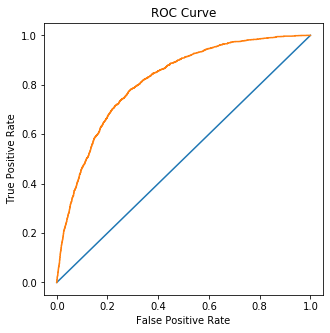

In [78]:
y_pred_prob = gb.predict_proba(x_test)[:,1]
auc_score = roc_auc_score(y_test, y_pred_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(5, 5))
plt.plot([0,1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

print("AUC:", auc_score)

11


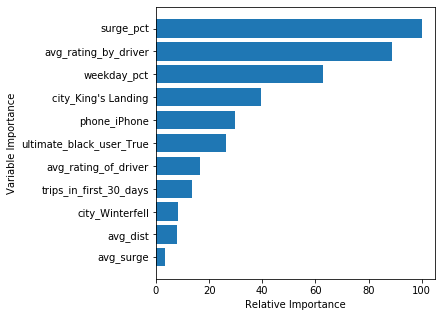

In [79]:
import itertools

feature_importance = gb.feature_importances_
feature_importance = 100 * (feature_importance / feature_importance.max())[:30]
sorted = np.argsort(feature_importance)[:30]

pos = np.arange(sorted.shape[0]) + .5
print(pos.size)
sorted.size
plt.figure(figsize=(5, 5))
plt.barh(pos, feature_importance[sorted], align='center')
plt.yticks(pos, X.columns[sorted])
plt.xlabel('Relative Importance')
plt.ylabel('Variable Importance')
plt.show()

# Conclusion

1. 26.07% of customers were retained after 5 months. 

2. The problem here is to use a classification method since we are trying to predict if customers will be retained after 6 months. 3 Machine learning models were tested; Decision Tree, Random Forest, and Gradient Boosting. These models were tested due to the simplicity and accuracy of the models. These models were compared and the best model was identified. Gradient Boosting had the highest F1 score of 0.77 and accuracy score of 78.3%. The AUC of the Gradient Boosting was 0.815. 

#### Future Improvements

- Possible event or marketing plan to increase customer surge multiplier. 
- Increase customer trip experience as the 2nd highest importance featuer was average rating by driver. 
- Increase incentives to use service during the weekdays 